Importing modules

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from get_recensement import get_recensement

Importing the recensement and storing it into `df`.

In [33]:
df = get_recensement()

KeyboardInterrupt: 

Defining the vocation categories and some colors into `vocation_categories`. Then we are storing informations in a potentially useful way in `df_`.

In [ ]:
vocation_categories = [
    ("rente", (0, 1, 1)),
    ("administration", (0.2, 0.2, 1)),
    ("service", (0.3, 0.3, 1)),
    ("commerce", (0.4, 0.4, 1)),
    ("artisanat", (1, 0, 0)),
    ("construction", (1, 0.5, 0)),
    ("agricole", (0.5, 0.8, 0.5)),
]
data = {
    "Division": [],
    "rente": [],
    "administration": [],
    "service": [],
    "commerce": [],
    "artisanat": [],
    "construction": [],
    "agricole": [],
}
divisions = df["Division"].unique()
for division in divisions:
    data["Division"].append(division)
    for vocation_categorie in data.keys():
        if vocation_categorie == "Division": continue
        data[vocation_categorie].append(len(df.query("Division == @division and chef_vocation_categorie == @vocation_categorie")))
        
df_ = pd.DataFrame(data)
df_["Division"] = df_["Division"].astype(str)
df_ = df_.sort_values(by="Division").reset_index(drop=True)
df_

,Division,rente,administration,service,commerce,artisanat,construction,agricole
0,1-2,72,5,84,17,89,47,86
1,10,41,11,38,17,76,34,17
2,11,16,7,42,15,53,43,31
3,12,13,4,25,7,30,38,73
4,13,24,1,22,22,43,18,10
5,14,22,2,27,0,35,19,19
6,15,39,17,35,6,46,35,22
7,16,13,3,30,15,23,34,33
8,17,131,2,26,8,10,5,122
9,18,5,0,1,0,7,5,44


Printing some plots as examples.

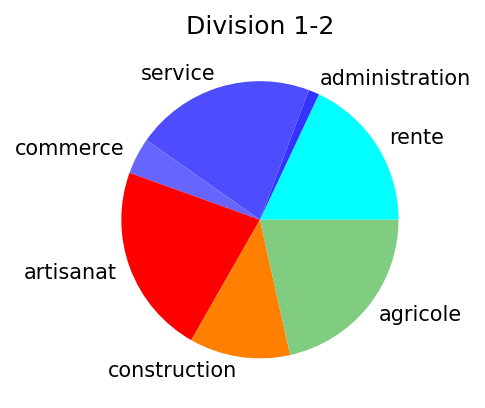

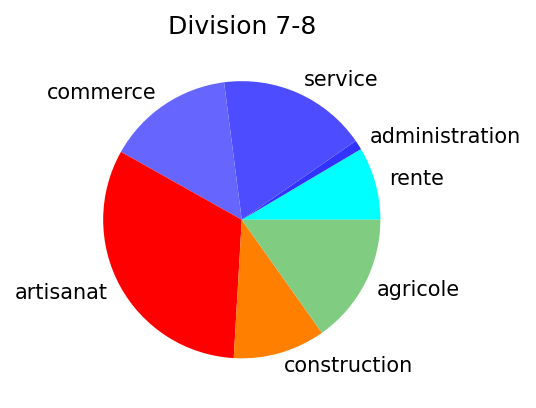

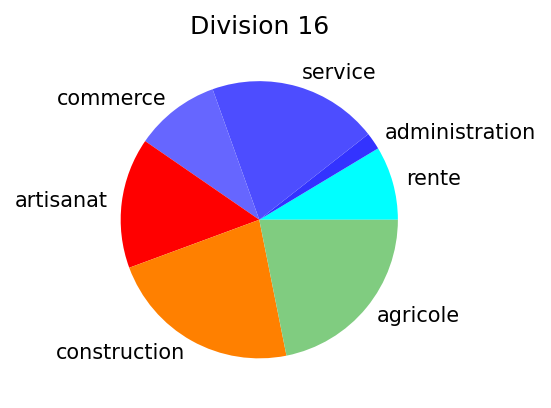

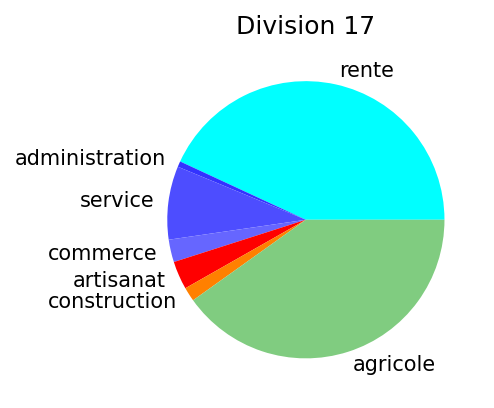

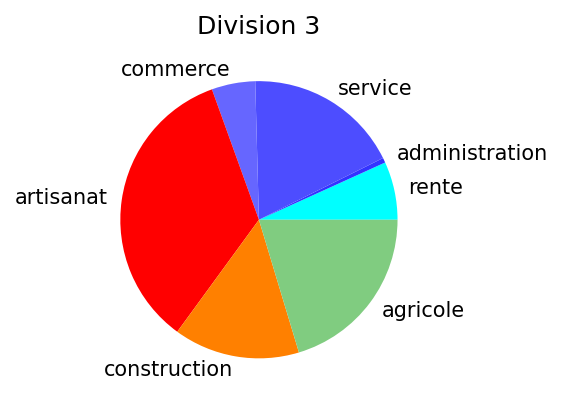

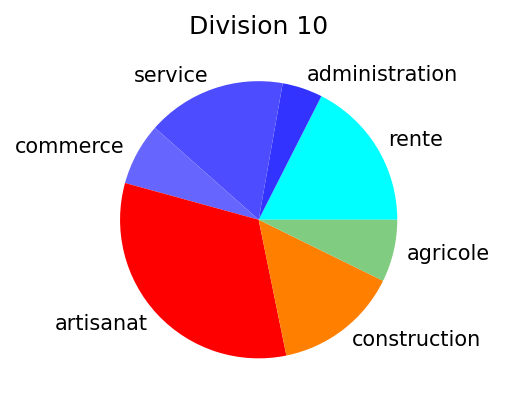

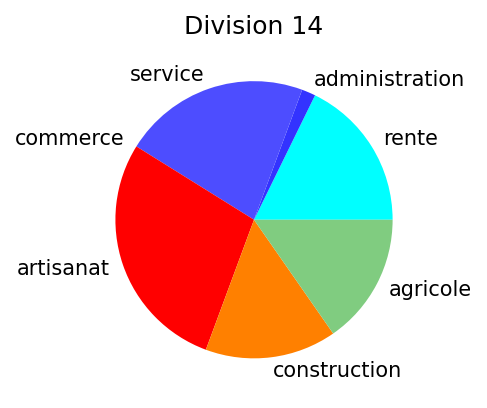

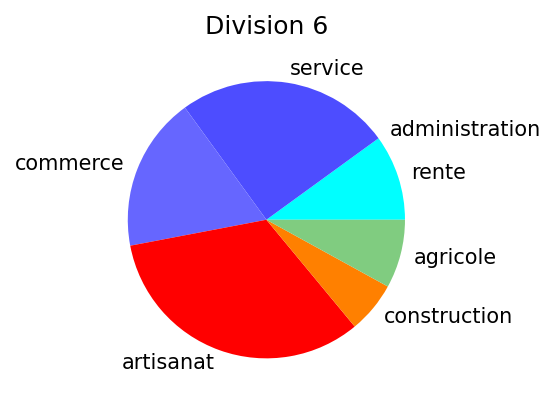

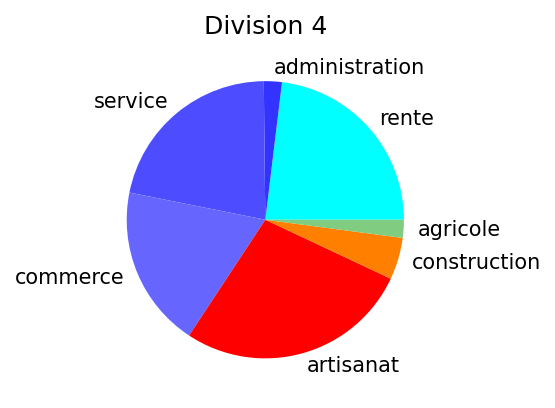

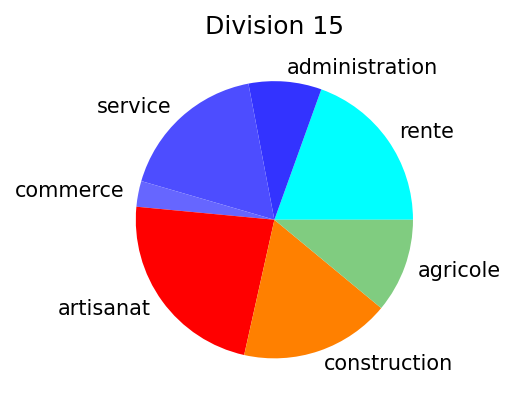

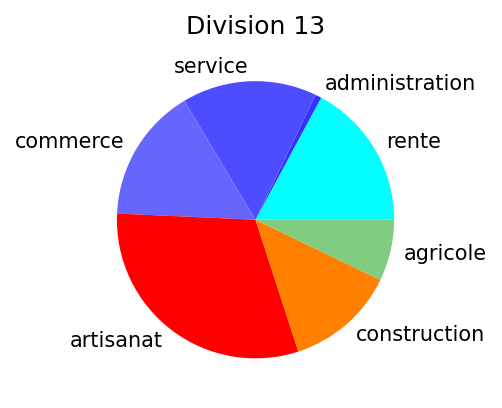

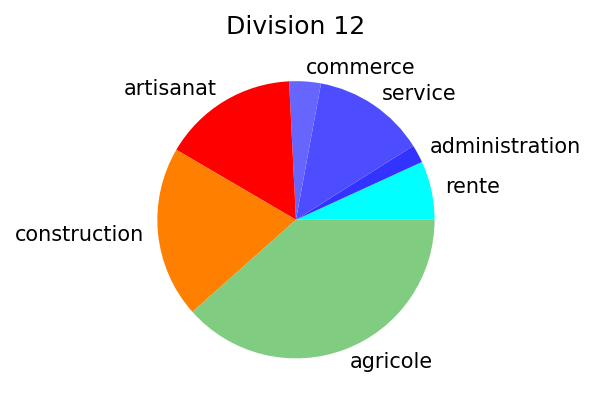

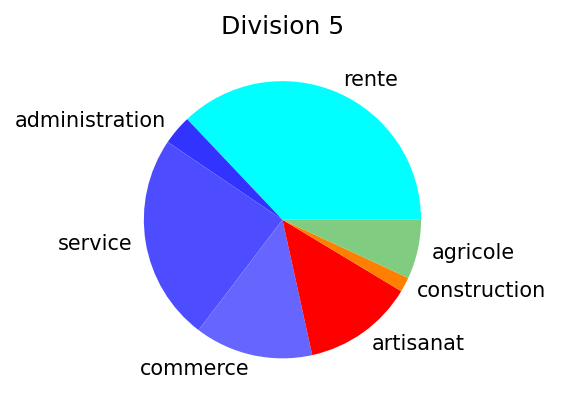

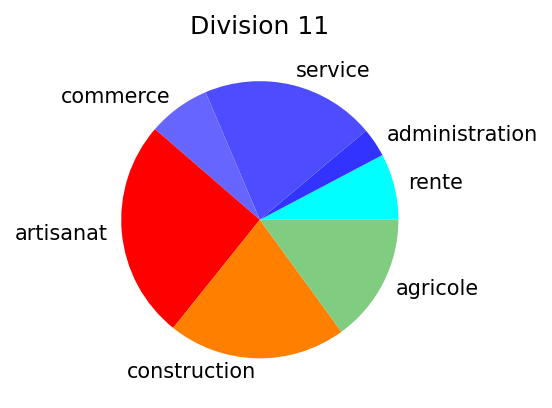

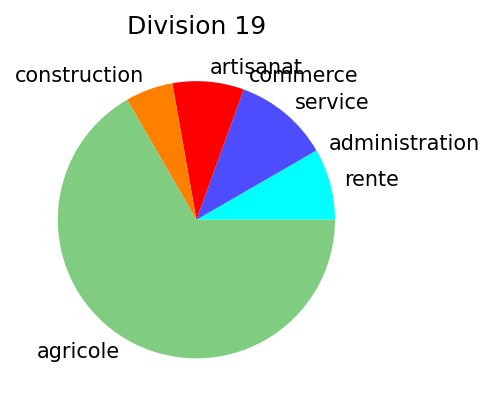

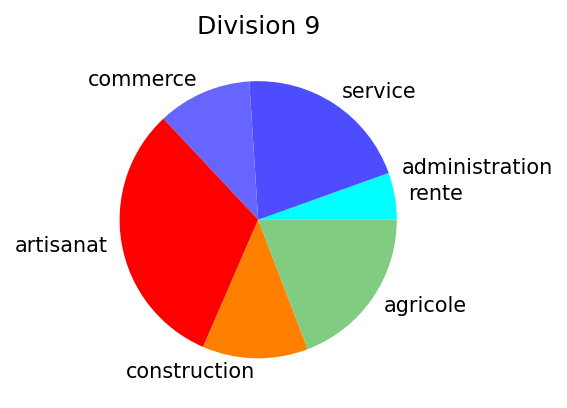

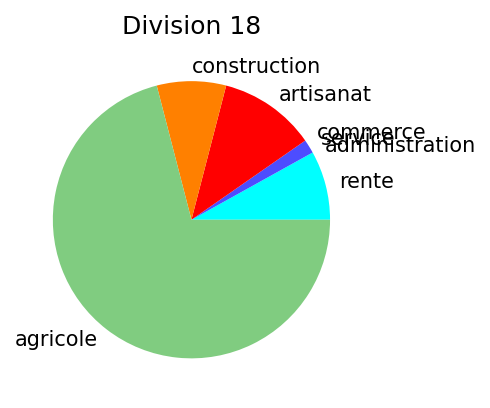

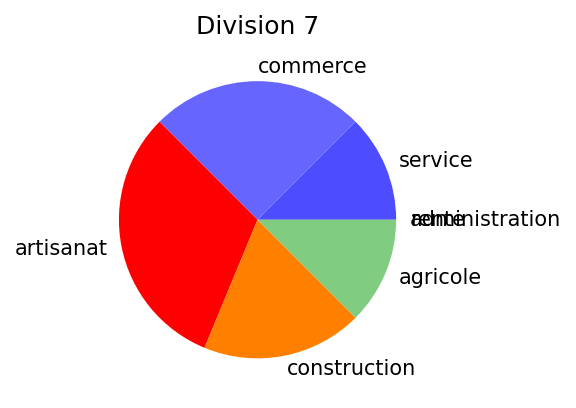

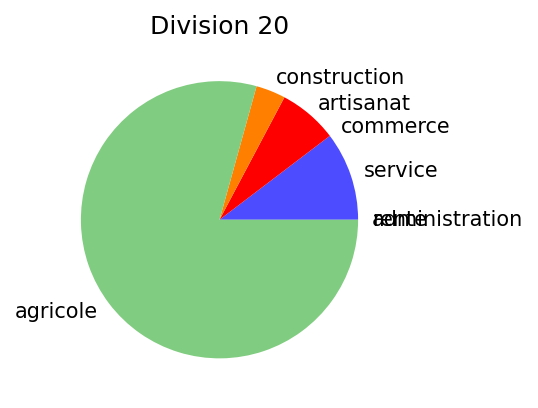

In [ ]:
for division in divisions:
    # make pie chart
    counts = []
    for categorie, _ in vocation_categories:
        counts.append(len(df.query(f"Division == @division & chef_vocation_categorie == @categorie")))
    if np.sum(counts) == 0: continue
    plt.figure(figsize=(3, 3), dpi=150)
    plt.title(f"Division {division}")
    plt.pie(counts, labels=[categorie for categorie, _ in vocation_categories], colors=[color for _, color in vocation_categories])
    # plt.legend(loc="left")

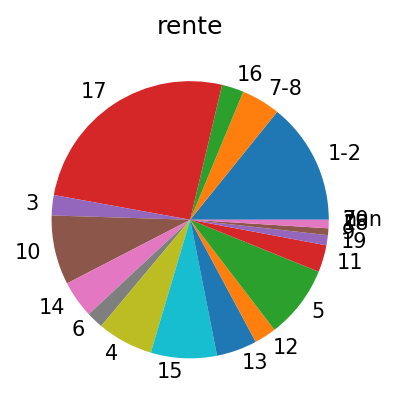

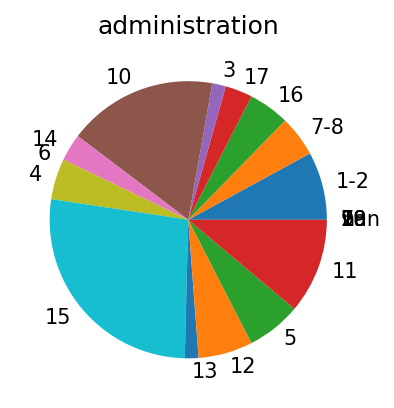

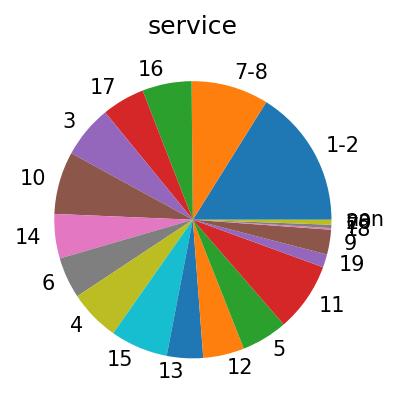

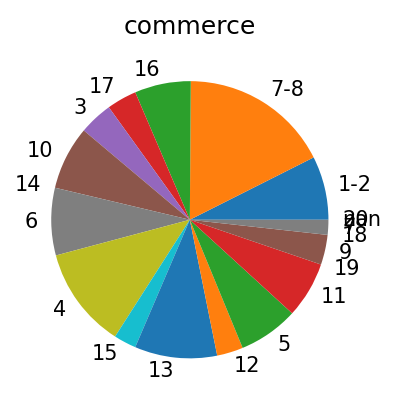

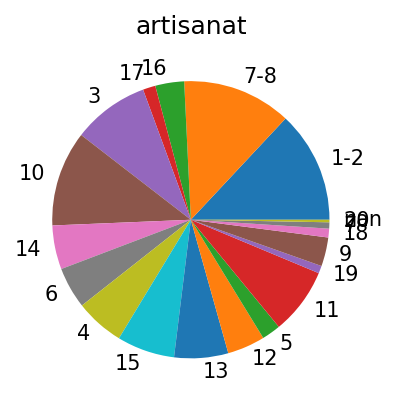

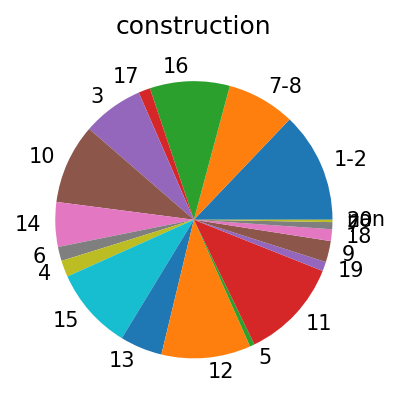

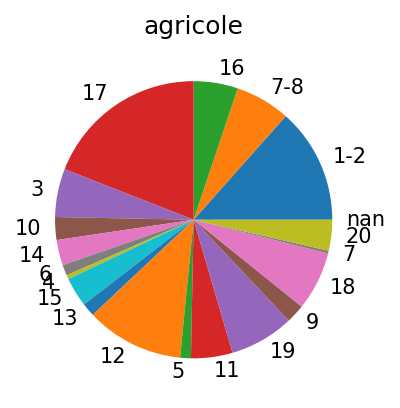

In [38]:
for categorie, _ in vocation_categories:
    # make pie chart
    counts = []
    for division in divisions:
        counts.append(len(df.query(f"Division == @division & chef_vocation_categorie == @categorie")))
    if np.sum(counts) == 0: continue
    plt.figure(figsize=(3, 3), dpi=150)
    plt.title(f"{categorie}")
    plt.pie(counts, labels=[division for division in divisions])
    # plt.legend(loc="left")

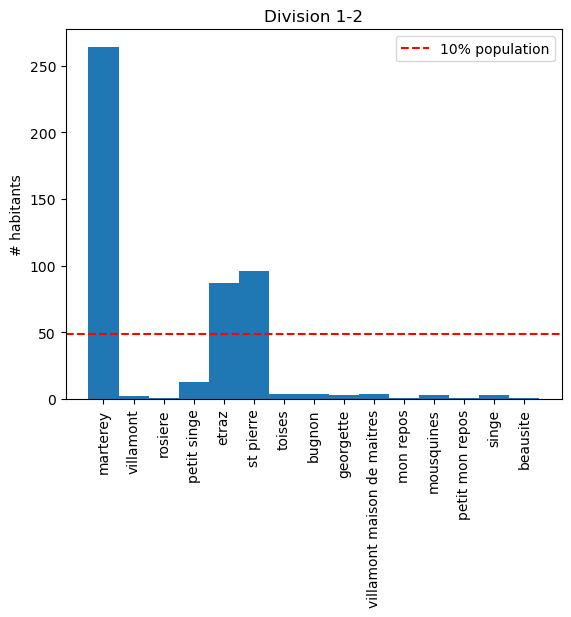

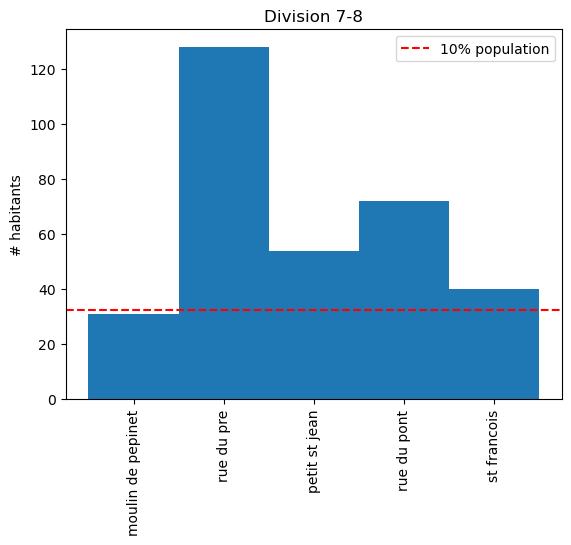

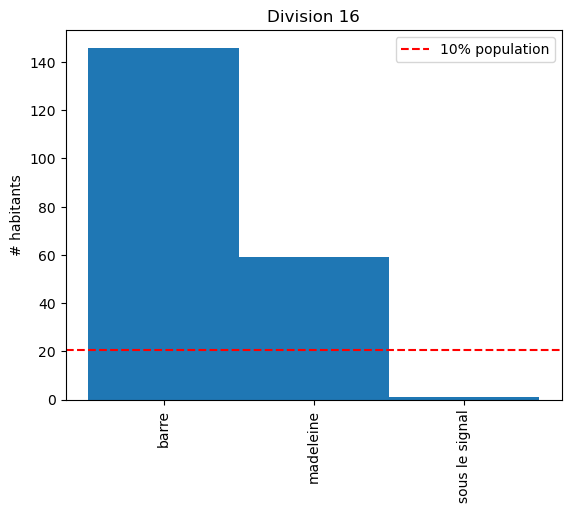

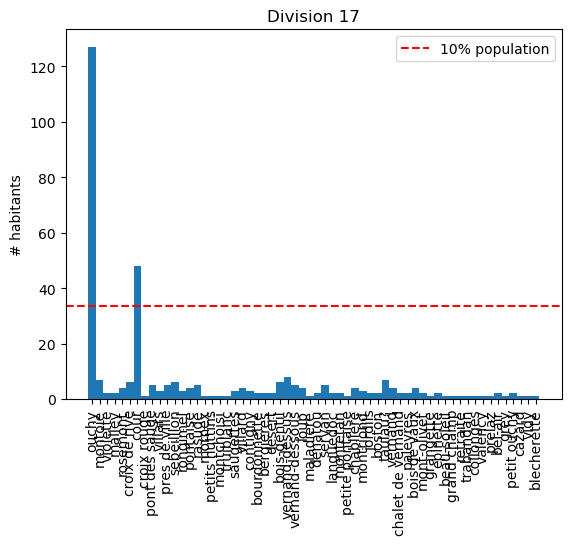

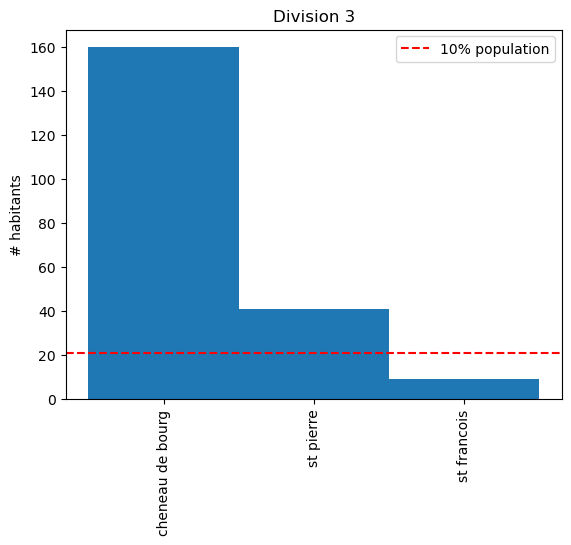

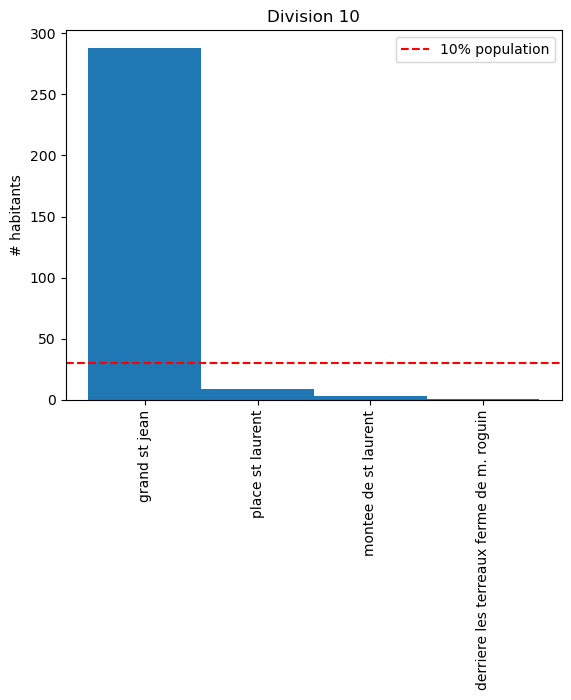

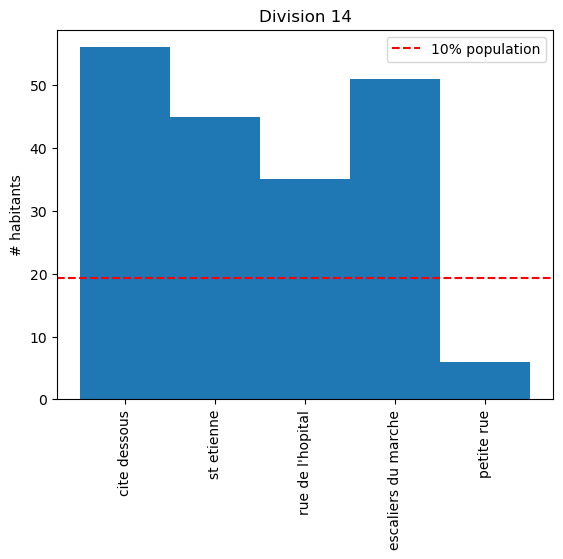

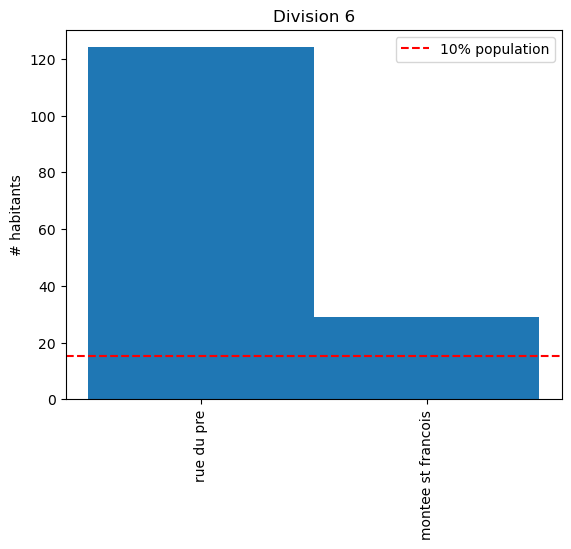

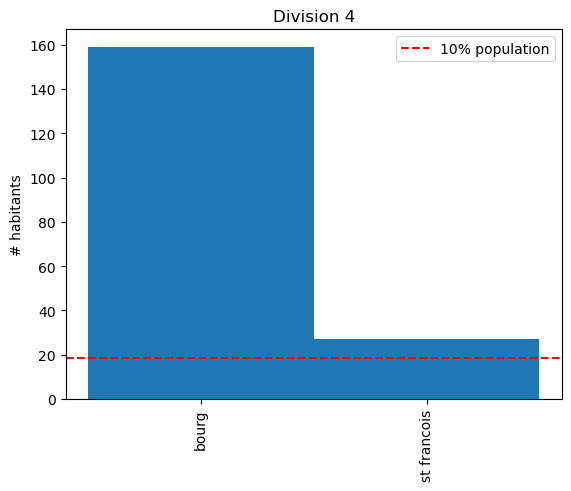

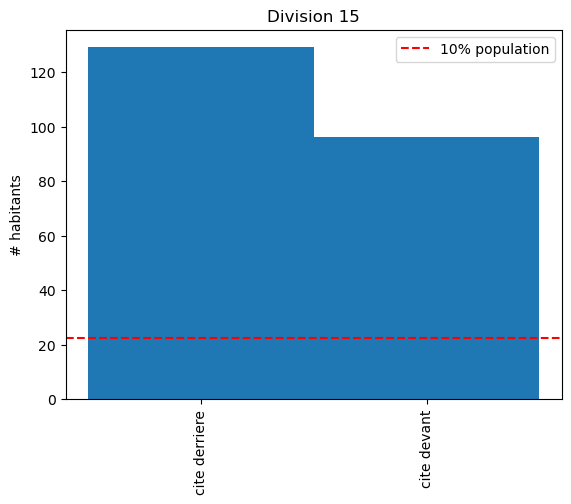

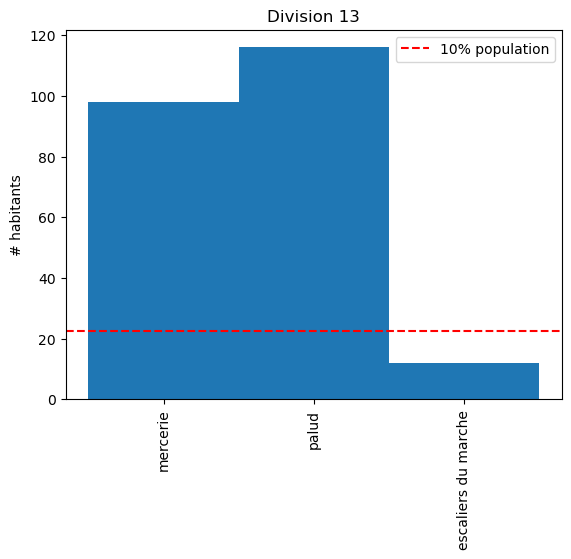

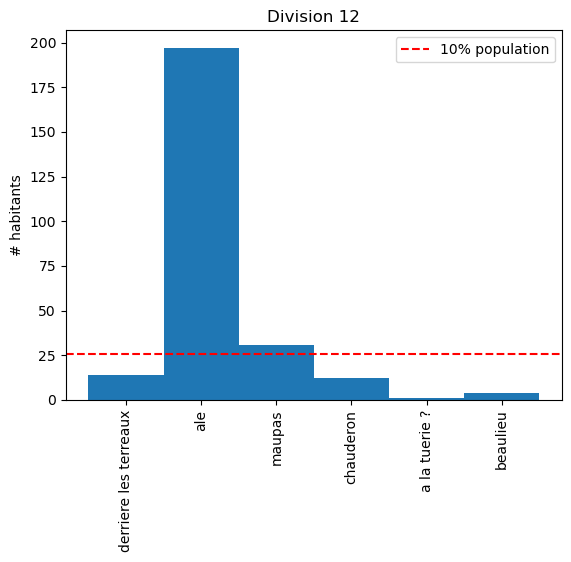

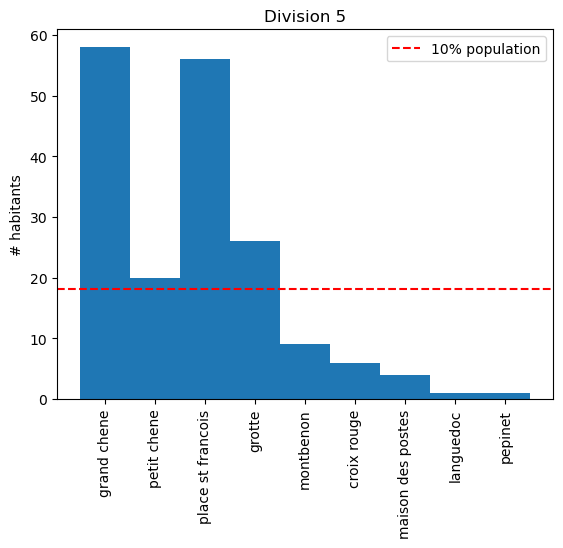

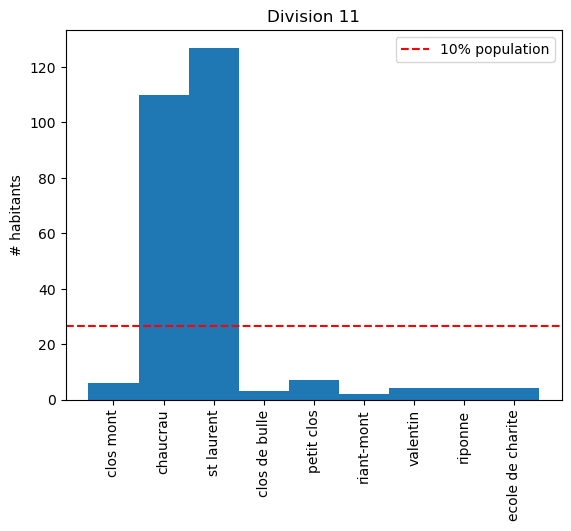

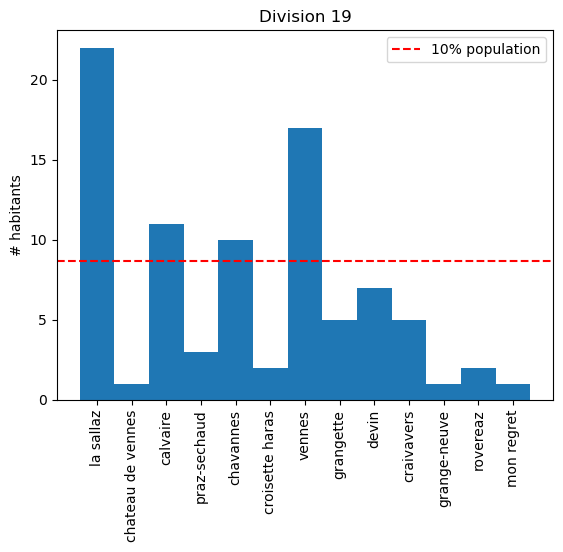

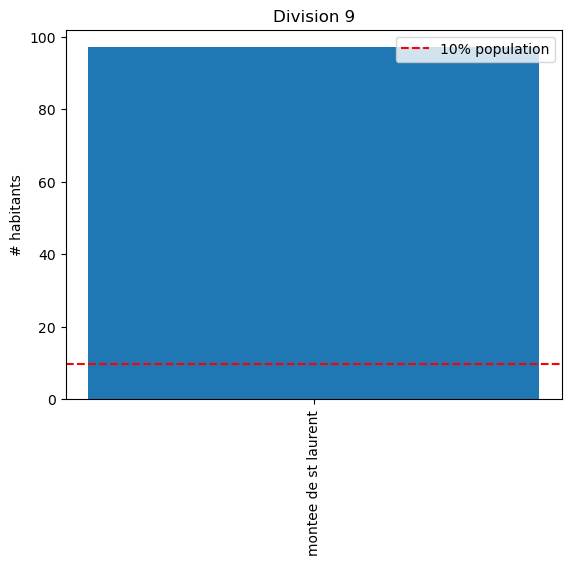

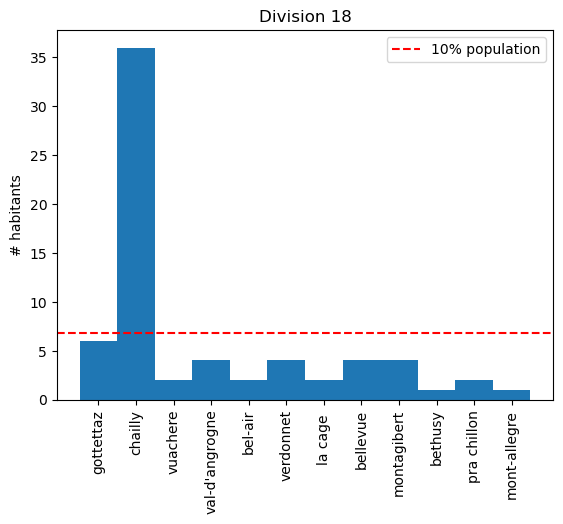

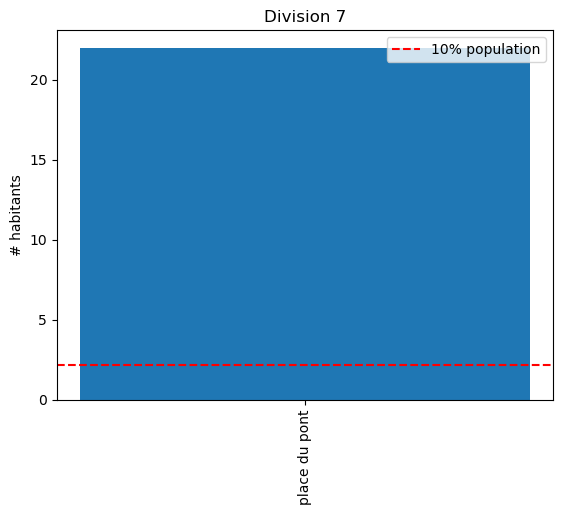

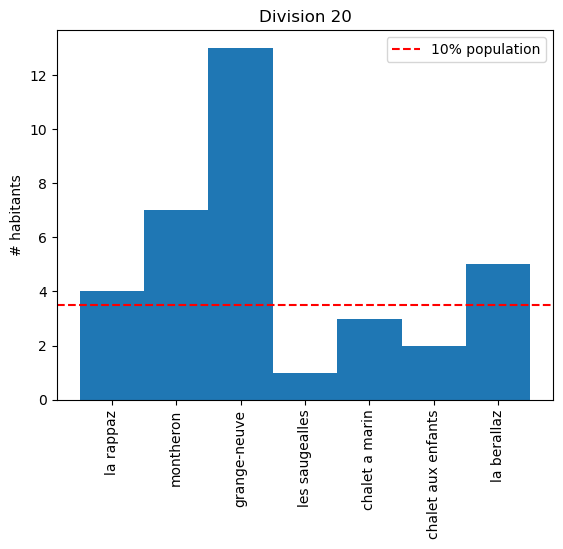

In [51]:
for division in divisions:
    # print(f"Division {division}")
    df_ = df.query("Division==@division")
    if len(df_) == 0: continue
    rues = df_["nom_rue_norm_2"].values
    plt.figure()
    plt.title(f"Division {division}")
    plt.hist(rues, bins=np.arange(start=-0.5, stop=len(np.unique(rues))-0.5+1, step=1))
    plt.axhline(y=len(rues)*0.1, color="red", linestyle="--", label="10% population")
    plt.xticks(rotation=90)
    plt.ylabel("# habitants")
    plt.legend()
    # for rue in np.unique(rues):
        # print(f"{rue} {sum(rues==rue)}")
    # print("")